# 1. Introducción

La inmobiliaria [Properati](https://www.properati.com.ar/data) publica periódicamente información sobre ofertas de propiedades para venta y alquiler. Ud. deberá asesorar a la inmobiliaria a desarrollar un modelo de regresión que permita predecir el precio por metro cuadrado de una propiedad. El objetivo final es que el modelo que desarrollen sea utilizado como tasador automático a ser aplicado a las próximas propiedades que sean comercializadas por la empresa. Para ello la empresa le provee de un dataset correspondiente al primer semestre de 2017. El dataset es de tamaño entre pequeño y mediano, pero tiene dos complejidades a las que
deberá prestarle atención:

- Peso de missing data en algunas variables relevantes.
- Será importante tener en cuenta el problema de la influencia espacial en los precios por metro cuadrado. En efecto, es probable que existan diferencias importantes en las diferentes geografías, barrios y zonas analizadas.

## Objetivos:

- Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar estrategias para lidiar con los datos perdidos en ciertas variables.
- Realizar un análisis descriptivo de las principales variables.
- Crear nuevas columnas a partir de las características dadas que puedan tener valor predictivo.

## Técnica
- Analizar cada categoria concentrandonos principalmente en m2 y precio ya que van a ser nuestras variables dependientes.
- Crear una categoria de USD/m2 que sera nuestro target en el modelo de regresion
- Eliminar categorias redundante, que no nos sean de relevancia para nuestro futuro modelo
- Analizar mediante graficos las principales categorias

## Informacion de columnas

El dataset contiene información sobre todas las propiedades georeferenciadas de la base de datos de la empresa. La información de cada propiedad que incluye es la siguiente:

- **Unnamed: 0:** Valores numericos continuos en orden ascendente que numeran cada sample
- **operation:** Operacion. Solo hay ventas (sell)
- **property_type:** El tipo de propiedad house (casa), apartment (Apartamento),  store (negocio) o PH
- **place_name:** Ciudad en la que se cuentra la propiedad. Hay de todo el pais. 
- **place_with_parent_names:** Nombre de la Ciudad/Provincia/Pais
- **country_name:** Nombre del pais
- **state_name:** Nombre de la region donde se encuentra
- **geonames_id:** ID de [GeoNames](https://www.geonames.org/)
- **lat-lon,lat y lon:** Tres columnas con latitud - longitud y mismos valores por separado
- **price:** Precio original de la publicación (No especifica moneda)
- **currency:** Tipo de moneda del aviso. Hay 'USD', 'ARS', 'PEN', 'UYU'
- **price_aprox_local_currency:** Precio del aviso en moneda local (ARS)
- **price_aprox_usd:** Precio aproximado en USD
- **surface_total_in_m2:** Superficie total en m²
- **surface_covered_in_m2:** Superficie cubierta en m²
- **price_usd_per_m2:** Precio en USD/m²
- **price_per_m2:** Precio por m²
- **floor:** Numero de pisos (Si los tiene)
- **rooms:** Numero de cuartos
- **expenses:** Valor de expensas mensuales
- **properati_url:** URL de publicación
- **description:** Descripcion de la publicación
- **title:** Titulo de la publicación
- **image_thumbnail:** URL de una miniatura de la primer foto de la publicación

In [1]:
#Importamos librerias para analisis de datos y visualizacion

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
#Cargamos dataset, utilizamos primera columna como indice porque presenta

data= pd.read_csv("properatti.csv", index_col=0)

# 2. Analisis exploratorio de datos

In [3]:
# Tamaño y columnas del dataset

print(f"El dataset tiene en total {data.size} valores repartidos en {data.shape[0]} filas y {data.shape[1]} columnas\n")

El dataset tiene en total 3030500 valores repartidos en 121220 filas y 25 columnas



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121220 entries, 0 to 121219
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   operation                   121220 non-null  object 
 1   property_type               121220 non-null  object 
 2   place_name                  121197 non-null  object 
 3   place_with_parent_names     121220 non-null  object 
 4   country_name                121220 non-null  object 
 5   state_name                  121220 non-null  object 
 6   geonames_id                 102503 non-null  float64
 7   lat-lon                     69670 non-null   object 
 8   lat                         69670 non-null   float64
 9   lon                         69670 non-null   float64
 10  price                       100810 non-null  float64
 11  currency                    100809 non-null  object 
 12  price_aprox_local_currency  100810 non-null  float64
 13  price_aprox_us

Hay 13 variables tipo Float y 12 tipo Object. Se observan varias variables con muchos valroes nulos

In [5]:
#pd.set_option('display.max_columns', None)
data.sample(5)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
75156,sell,apartment,Almagro,|Argentina|Capital Federal|Almagro|,Argentina,Capital Federal,3436397.0,NaN,NaN,NaN,...,41.0,2906.976744,3048.780488,NaN,NaN,NaN,http://www.properati.com.ar/1apwq_venta_depart...,Venta Monoambiente Divisible - Almagro Excelen...,Venta Monoambiente Divisible - Almagro,https://thumbs4.properati.com/4/f8PKMGEp5dJYQa...
70298,sell,house,Lanús,|Argentina|Bs.As. G.B.A. Zona Sur|Lanús|Lanús|,Argentina,Bs.As. G.B.A. Zona Sur,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,http://www.properati.com.ar/1ajd8_venta_casa_l...,Planta alta: departamento. interno 2 dormitori...,Ph 3 ambientes y Galpón - Oportunidad,https://thumbs4.properati.com/0/Qr8_du1tOqr_iq...
20505,sell,house,Hurlingham,|Argentina|Bs.As. G.B.A. Zona Oeste|Hurlingham|,Argentina,Bs.As. G.B.A. Zona Oeste,3433522.0,"-34.628641,-58.653334",-34.628641,-58.653334,...,140.0,NaN,1000.000000,NaN,NaN,NaN,http://www.properati.com.ar/17cuk_venta_casa_h...,Corredor Responsable: Marcela Lucero - CMCPDJM...,AMPLIA CASA CON PILETA ITUZAINGO / VILLA TESEI,https://thumbs4.properati.com/7/5cp9q0TcEZoIEq...
4191,sell,apartment,Balvanera,|Argentina|Capital Federal|Balvanera|,Argentina,Capital Federal,6693228.0,"-34.61162567,-58.39373779",-34.611626,-58.393738,...,40.0,NaN,NaN,NaN,1.0,NaN,http://www.properati.com.ar/15m11_venta_depart...,Departamento muy bien ubicado a 1 cuadra de E...,U$D 80.000 - Departamento en Venta - Alsina Ad...,https://thumbs4.properati.com/8/ihCFTrR-goYUHg...
54207,sell,house,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,3427753.0,"-34.425087,-58.5796585",-34.425087,-58.579659,...,241.0,1580.858086,1987.551867,NaN,NaN,NaN,http://www.properati.com.ar/19mnl_venta_casa_t...,*** SOBRE LOTE AL AGUA CON GRAN VISUAL - ESCUC...,Bustamante Propiedades | San Francisco (Tigre)...,https://thumbs4.properati.com/7/WEO0B1T_2TBWVu...


## 2.1 Missing Values

In [6]:
# Rapido vistazo a missing values

df_nulls = pd.DataFrame({"NaN": data.isna().sum(), 
                        "%" : round(data.isna().sum()/data.shape[0]*100)}).sort_values(by= "NaN", ascending=False)
df_nulls

,NaN,%
floor,113321,93.0
expenses,106958,88.0
rooms,73830,61.0
price_usd_per_m2,52603,43.0
lat-lon,51550,43.0
lat,51550,43.0
lon,51550,43.0
surface_total_in_m2,39328,32.0
price_per_m2,33562,28.0
currency,20411,17.0


Principales categorias con valores nulos son floor, expenses, rooms y price_usd_per_m2

## 2.2 Valores Duplicados

In [7]:
data.duplicated().any()

False

No hay filas duplicadas

# 3. Transformaciones sobre campos

## 3.1 Creamos una subclasificacion segun region

In [8]:
#Diccionario con las diferentes regiones

regiones_dict = {"noroeste":["Catamarca","Jujuy","La Rioja","Salta", "Santiago Del Estero","Tucumán"],
                "noreste" : ["Corrientes", "Chaco", "Formosa", "Misiones"],
                "cuyo": ["Mendoza", "San Juan", "San Luis"],
                "pampeana": ["Córdoba", "Entre Ríos", "La Pampa", "Santa Fe"],
                "patagonia" : ["Río Negro", "Neuquén", "Chubut", "Santa Cruz", "Tierra Del Fuego"],
                "gran_buenos_aires" : ["Bs.As. G.B.A. Zona Sur", "Bs.As. G.B.A. Zona Norte","Bs.As. G.B.A. Zona Oeste","Buenos Aires Interior", "Buenos Aires Costa Atlántica" ],
                "caba":["Capital Federal"]}

#Nueva columna con las nuevas regiones
data["region_name"] = None
for k,v in regiones_dict.items():
    mask_region = data.state_name.isin(v)
    data["region_name"].loc[mask_region] = k 

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1812\1073111539.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["region_name"].loc[mask_region] = k


## 3.2 Division entre Categorias Categoricas y Numericas

Para mejor analisis de los datos vamos a dividirlos en Categoricos y Numericos

In [9]:
categorical = data.select_dtypes("object")
numerical = data.select_dtypes("float")

# 4. Análisis de variables numéricas

In [10]:
numerical.describe().T.round(1).sort_values(by='count',ascending=False)

,count,mean,std,min,25%,50%,75%,max
geonames_id,102503.0,3574442.3,354130.6,3427208.0,3430234.0,3433910.0,3836668.0,6948895.0
surface_covered_in_m2,101313.0,133.1,724.4,0.0,45.0,75.0,150.0,187000.0
price,100810.0,468525.9,2260100.6,0.0,110000.0,185000.0,420000.0,650000000.0
price_aprox_local_currency,100810.0,4229396.8,6904714.1,0.0,1583309.4,2558452.5,4675792.5,821271104.3
price_aprox_usd,100810.0,239700.6,391323.9,0.0,89733.9,145000.0,265000.0,46545445.0
price_per_m2,87658.0,6912.2,28378.6,1.5,1550.0,2213.1,3355.5,4000000.0
surface_total_in_m2,81892.0,233.8,1782.2,0.0,50.0,84.0,200.0,200000.0
lat,69670.0,-34.6,2.0,-54.8,-34.7,-34.6,-34.4,4.5
lon,69670.0,-59.3,2.3,-75.7,-58.7,-58.5,-58.4,-53.7
price_usd_per_m2,68617.0,2160.1,2759.3,0.6,1218.2,1800.0,2486.4,206333.3


## 4.1 m2

In [11]:
# Creo 2 variables para organizar las features que me interesan y otra para descripton asi realizo regex para completar
data_m2 = data.loc[:,["surface_covered_in_m2", "surface_total_in_m2", "price_usd_per_m2", "price_per_m2"]]
data_description = data.loc[:,"description"]

In [12]:
# Nulos
data_m2.isna().sum()/data.shape[0]*100

surface_covered_in_m2    16.422208
surface_total_in_m2      32.443491
price_usd_per_m2         43.394654
price_per_m2             27.686850
dtype: float64

In [13]:
data_m2.describe().T

,count,mean,std,min,25%,50%,75%,max
surface_covered_in_m2,101313.0,133.050181,724.351479,0.000000,45.000000,75.000000,150.000000,1.870000e+05
surface_total_in_m2,81892.0,233.795328,1782.222147,0.000000,50.000000,84.000000,200.000000,2.000000e+05
price_usd_per_m2,68617.0,2160.086916,2759.288621,0.600000,1218.181818,1800.000000,2486.411765,2.063333e+05
price_per_m2,87658.0,6912.215705,28378.644734,1.510204,1550.000000,2213.114754,3355.548611,4.000000e+06


Observamos que en surface_covered_in_m2 y surface_total_in_m2 hay valores minimos de "0" y max de 187000, lo que son outliers y vamos a tener que limpiarlos para que no afecte nuestro modelo. Esto se observa en la diferencia que hay entre media y mediana.

1. Tengo que elegir entre covered_m2 y total_m2. Decidiemos por total_m2 ya que es lo mas objetivo. En el Total se encuentran los m2 cubiertos ademas de los descubiertos, caracteristica que cambia el precio al comprar una propiedad. Ademas al analizar los diferentes ejemplos que hay samples en donde el valor de m2 cubiertos es mayor al total, lo que interpretamos como errores por lo cual vamos a utilizarlos como si fueran los totales.
2. Completar los datos que no tenemos en totales con los cubiertos. Luego realizar regex. Y por lo ultimo, observar si hay datos en price_usd_per_m2 y price_per_m2 que reconvirtiendolo puedan darnos los m2.

In [14]:
# 1. A. Buscamos los valores de M2 invertidos en los totales y cubiertos
m2_inverse = (data_m2.surface_covered_in_m2 > data_m2.surface_total_in_m2)

print(f"Los valores invertidos de m2 cubiertos son {m2_inverse.sum()}")

Los valores invertidos de m2 cubiertos son 1106


In [15]:
# 1.A Completamos los valores de totales con los cubiertos y reinvertimos los que estaban al reves

# Primero creamos NaN en los valores invertidos
data_m2.surface_total_in_m2[m2_inverse] = np.NaN

#Ahora llenamos los NaN con los valores de covered
data_m2.surface_total_in_m2.fillna(data_m2.surface_covered_in_m2, inplace=True)

In [16]:
data_m2.isna().sum()/data.shape[0]*100

surface_covered_in_m2    16.422208
surface_total_in_m2      10.203762
price_usd_per_m2         43.394654
price_per_m2             27.686850
dtype: float64

Disminuimos el porcentaje de NaN de m2 al 10%. Vamos a tratar de disminuir realizando regex en descripcion

In [17]:
# 1.B regex para encontar m2

import re
# defino funcion

def extract_description(pattern, data):
    #Primero paso a la columna a str para poder utilizar regex
    description_str = data["description"].astype(str)
    #Extraigo las frases que tenga un numero seguido por ambiente o amb en mayuscula o minuscula
    return description_str.str.extract(pattern, expand=False)

In [18]:
# Creo una mascara de los samples Nan
mask_m2 = data_m2.surface_total_in_m2.isna()
#Creo variable con solo estos samples
data_m2_describe = data.loc[mask_m2, ["description"]]

In [19]:
# Defino pattern 
pattern_m2 = re.compile(r"(m2\s*\d+|\d+\s*m2)", flags=re.IGNORECASE)

# Creo columna para checkear los diferentes valores que extraigo
data_m2_describe["check_m2"] = extract_description(pattern_m2, data_m2_describe)


In [20]:
#Observo que extraje correctamente valores que me interesaban
data_m2_describe.check_m2.unique()

array([nan, '83M2', '82M2', '460 m2', '375m2', '75 m2', '120 M2',
       '2290 m2', '80m2', '74m2', '7 M2', '400 M2', '35 m2', '45 M2',
       '160 m2', '1600 M2', '800 M2', '500m2', '68 m2', '150 M2',
       '225 m2', '150m2', '35m2', '4 m2', '15m2', '144M2', '25 m2',
       '155m2', '251 m2', '335m2', '1000 m2', '19M2', '480 m2', '903m2',
       '181 m2', '416 m2', '970 m2', '164 m2', '90 m2', '30m2', '88m2',
       '52m2', '38m2', '50m2', '830m2', '48 M2', '185 m2', '77 m2',
       '100 m2', '313 m2', '78 m2', '50 m2', '71 m2', '31 m2', '205 m2',
       '60 m2', '60m2', '83m2', '95m2', '1525 M2', '889 m2', '79 m2',
       '81 m2', '32m2', '10 m2', '36 m2', '82m2', '580m2', '1070 m2',
       '27 M2', '43m2', '00 m2', '400 m2', '90m2', '69 m2', '62 m2',
       '760 m2', '67 m2', '31 M2', '110 m2', '29 m2', '120 m2', '36m2',
       '375 m2', '510 m2', '151m2', '565m2', '42 m2', '120m2', '496 M2',
       '20M2', '69M2', '93 m2', '190m2', '100m2', '265m2', '50M2',
       '218 m2', '150 m

In [21]:
#Elimino los m2 y dejo solo el valor
regex_m2 = data_m2_describe.check_m2.str.replace(r"(m2)","" ,flags=re.IGNORECASE).astype(float)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1812\3026134631.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  regex_m2 = data_m2_describe.check_m2.str.replace(r"(m2)","" ,flags=re.IGNORECASE).astype(float)


In [22]:
#Completo los Nans con los valores que extraje de description
data_m2["surface_total_in_m2"].fillna(regex_m2, inplace=True)

In [23]:
# observo como quedaron los Nan
data_m2.isnull().sum()/data.shape[0]*100
# Disminuyo un 2 %

surface_covered_in_m2    16.422208
surface_total_in_m2       8.511797
price_usd_per_m2         43.394654
price_per_m2             27.686850
dtype: float64

In [24]:
# 1.C Comparo las columnas de Nan que me faltan para ver si puedo compeltarlo con las features price_usd_per_m2 y price_per_m2
# Creo de nuevo la mascara
mask_m2 = data_m2.surface_total_in_m2.isna()

data_m2.loc[mask_m2,["surface_total_in_m2", "price_usd_per_m2", "price_per_m2"] ].isna().any()


surface_total_in_m2    True
price_usd_per_m2       True
price_per_m2           True
dtype: bool

Confirmo que en ninguna columna tengo valores para completar

In [25]:
#Veo como quedaron las features
data_m2.isnull().sum()/data_m2.shape[0]*100

surface_covered_in_m2    16.422208
surface_total_in_m2       8.511797
price_usd_per_m2         43.394654
price_per_m2             27.686850
dtype: float64

In [26]:
#Agregar datos a m2_totales
data.surface_total_in_m2 = data_m2.surface_total_in_m2

In [27]:
data.surface_total_in_m2.describe()

count    110902.000000
mean        221.442661
std        2089.972808
min           0.000000
25%          50.000000
50%          83.000000
75%         192.000000
max      420180.000000
Name: surface_total_in_m2, dtype: float64

Como ultima instancia se podrian imputar los valores nulos por diferentes metodos como por la media o mediana pero al ser parte de nuestra variable dependiente y predictora, esto alteraria nuestro futuro modelo de regresion. 

Ademas observamos valores como 0 o 420180.000000 que estan muy alejados de la mediana y seguramente sean outlier. Vamos a solucionar este problema mas adelante

## 4.2 Precio

Completar los precios en dolares. 

1. Analizar valores de los 3 tipos de precios y ver sus caracteristicas
2. Comparar precio en dolares con moneda local para evaluar si hay algun valor que se pueda usar mediante conversion para rellenar un sample
3. Busqueda en price_usd_per_m2 y price_per_m2 para que mediante multiplicacion con los metros cuadrados se pueda sacar su precio total
4. Regex para completar los precios.

In [28]:
#1. Observacion de los tipos de precio
#Creo variable para mejor organizacion

data_price = data.loc[:, ["price", "price_aprox_local_currency","price_aprox_usd"]] 

In [29]:
data_price.describe().T

,count,mean,std,min,25%,50%,75%,max
price,100810.0,4.685259e+05,2.260101e+06,0.0,110000.00,185000.0,420000.0,650000000.0
price_aprox_local_currency,100810.0,4.229397e+06,6.904714e+06,0.0,1583309.44,2558452.5,4675792.5,821271104.3
price_aprox_usd,100810.0,2.397006e+05,3.913239e+05,0.0,89733.88,145000.0,265000.0,46545445.0


Se observa que hay valores minimos de 0, clara muestra de outliers. Solucionaremos esto mas adelante.

Todos tienen la misma cantidad de valores no nulos, pero se observa una diferencia entre sus estadisticos concordante con que cada feature maneja diferentes tipos de monedas. price_aprox_local_currency: Pesos ARG, price_aprox_usd: USD y price segun su moneda que en este caso son 'USD', 'ARS', 'PEN', 'UYU'.


In [30]:
# 2. Vamos a comparar las tres features para ver si tienen los mismos valores faltantes

#Creo mascara para solo los Nan

mask_price_nan = data_price["price_aprox_usd"].isna()

data_price.loc[mask_price_nan, :].isna().all()




price                         True
price_aprox_local_currency    True
price_aprox_usd               True
dtype: bool

Todos los precios tienen los mismos Nan

In [31]:
# 2. Comparo con los precio en m2 para ver si reconvirtiendo puedo completarlos

#Creo variable con las features que me interesan solo de los valores Nan de precio

data_price_m2  = data.loc[mask_price_nan, ["price_aprox_usd","price_usd_per_m2", "price_per_m2"]]

# Compruebo si son todos Nan
data_price_m2.isna().all()

# Confirmo que no puedo completar con estas varaibles asi que paso a realizar regex

price_aprox_usd     True
price_usd_per_m2    True
price_per_m2        True
dtype: bool

In [32]:
#3. Realizo regex

# Creo variable con solo las columnas con precios Nan para mejor manejo
data_usd_description = data.loc[(mask_price_nan),["description"]]

#Observo brevemente como se distribuyen las descripciones. Para poder mejorar la lectura aumento la capacidad de texto que puedo leer
pd.set_option('max_colwidth', 450)
data_usd_description.head(20)

,description
5,"Casa en el perímetro del barrio 338, ubicada en el extremo sur este del barrio, sobre calle 3 de caballería casi Nágera. Vista libre a terreno en frente.Consta de dos dormitorios, baño, living cocina comedor integrado de buen tamaño, lavadero con despensero en aluminio.Patio privado con churrasquera, tapiales y puerta de acceso de servicio. Frente con rejas y pequeño patio con verde, porch de acceso.Gas natural en la puerta. Aire acondicionad..."
20,"Consta de: Comedor-cocina, cuatro dormitorios (uno con baño en suite), un baño, otro baño para terminar, cuarto de herramientas y amplio parque."
41,"“Arecas” es un complejo de dúplex y departamentos de primera calidad constructiva ubicado en el mejor Barrio Residencial de Villa Carlos Paz. Pensamos en brindarles una opción acorde a cada necesidad: para la persona o familia que busca su vivienda, el ahorrista que elige una vivienda en construcción para capitalizarse y el inversionista que apuesta a la excelente renta que ofrece la Villa en alquileres temporarios. • Financiación: FINANCIACI..."
62,"Casa moderna en dos plantas.PB : Living con hogar, cocina-comedor diario, toilette de recepción, lavadero y estudio, todos los pisos de cerámicos, carpinterí­a exterior en aluminio blanco con doble vidrio.PA: Hall de distribución, con pequeño espacio para escritorio y placard. Dos dormitorios, baño compartido y suite con vestidor. Todos los pisos flotantes."
67,PLANTA ALTA: DORMITORIO EN SUITE - BALCÓNPLANTA BAJA: 2 DORMITORIOS - BAÑO - COCINA - LIVING/COMEDOR - LAVADERO - PATIO- FONDO LIBRE- ENTRADA DE AUTO - LOCAL CON BAÑOCONSULTE VALOR
76,"Impecable casa moderna ubicada en la loma de Stella Maris. Consta de amplia recepcion, toilette, cocina comedor, 3 dormitorios (principal en suite), garage p/ 4 autos, quincho con parrilla, dependencia de servicio con baño y gran parque. La calefaccion es por radiadores. Consulte."
83,"IDEAL INVERSORES o ESTUDIANTES APTA CREDITO Antigüedad 30 años Superficie cubierta: 55 m2 Contrafrente, interno Ingreso a living-comedor con cocina anexa (ventila naturalmente) Pasillo distribuidor a baño con ducha completa y dos dormitorios. Construcción solida con pisos de cerámica en estado inmaculado, puerta con doble cerradura. Seguridad fines de semana y lunes a viernes de (22 a 6 am) y cámaras de vigilancia. - Publicado por"
84,"Departamento en PB con cocina comedor separado. Instalación y sector para lavarropas. Estar, 1 baño y 2 dormitorios con placares. Patio de uso compartido. En Buen estado Cuenta con cochera cubierta en planta baja (Medidas 2.50 x 5.00 m) Edificio de PB y dos pisos con escalera. MUY BAJAS EXPENSAS NO APTA CREDITO - Publicado por"
85,"Corrientes 1900 – 1º Piso Departamento de 1 dormitorio (semipiso) Cocina con alacena y bajo mesada semi-integrada al living comedor. Instalación para lavarropas. Circulación o paso hacia baño y dormitorio. 1 dormitorio con vista despejada hacia el Noreste. Muy luminoso. Placares con interiores. Baño con bañera. Balcón Terraza, muy amplio. Posibilidad de instalar parrillero. Antigüedad 2 años FRENTE, orientación Oeste Superficie total: 63 m2 E..."
100,San Nicolás 365ENTREGA INMEDIATA.Edificio de escaleraPlanta baja y 3 pisosCompuesto de:4 Departamentos dos dormitorios7 Departamentos un dormitorio7 Monoambientes3 Cocheras. 4404242 / 4403232Santa Fe Piso 6 Oficina 42000 | Rosario | Santa Fe | Argentina Horario de Atención: Lunes a Viernes de 10.00 a 18.00. EasyBroker ID: EB-AI0748


In [33]:
# Reinicio el tamaño para ve la descripcion
pd.reset_option("max_colwidth")

Como observo que hay varios valores que corresponden a alquiler voy a eliminar estos samples para evitar confusion

In [34]:

alquiler_pattern = re.compile(r"(alquilado|alquiler|alquilo|alquilar)", flags=re.IGNORECASE )

describe_alquiler = extract_description(alquiler_pattern, data_usd_description)

#Observo que capto correcamente los valores
describe_alquiler.unique()

array([nan, 'alquiler', 'Alquilado', 'ALQUILADO', 'alquilado', 'ALQUILER',
       'alquilar', 'Alquiler', 'ALQUILAR', 'ALQUILO', 'Alquilo'],
      dtype=object)

In [35]:
# Drope esos valores de la variable que cree
data_usd_description.drop(data_usd_description[describe_alquiler.notnull()].index, inplace=True)

data_usd_description

,description
5,"Casa en el perímetro del barrio 338, ubicada e..."
20,"Consta de: Comedor-cocina, cuatro dormitorios ..."
62,Casa moderna en dos plantas.PB : Living con ho...
67,PLANTA ALTA: DORMITORIO EN SUITE - BALCÓNPLANT...
76,Impecable casa moderna ubicada en la loma de S...
...,...
121208,Puertos- Barrio Vistas - L. 88Casa en venta so...
121210,Dos viviendas en block en excelente ubicación ...
121211,Excelente departamento de categoría con vistas...
121212,ESPECTACULAR CASA ESTILO RACIONALISTA EN CALLE...


In [36]:
# Creo pattern para dolares y pesos separados ya que los pesos tengo que convertirlos us\$
usd_pattern = re.compile(r"(\d*\.*\d*\.*\d+\s*u\$s|u\$s\s*\d+\.*\d*\.*\d*|\d*\.*\d*\.*\d+\s*usd|usd\s*\d+\.*\d*\.*\d*|\d*\.*\d*\.*\d+\s*us\$?|us\$?\s*\d+\.*\d*\.*\d*)", flags=re.IGNORECASE)

#Extraigo los valores con usd, u$d o us 
describe_usd = extract_description(usd_pattern,data_usd_description)

In [37]:
describe_usd.value_counts()

USD 1          217
U$S 1          181
u$s20.000.      66
U$S 40.0002     32
USD45.000       32
              ... 
U$S 335.000      1
U$S 343.000      1
U$S 445.000      1
U$S 67.000.      1
USD 30.000       1
Name: description, Length: 321, dtype: int64

In [38]:
# Elimino los valores con null porque me alteran el resultado
describe_usd = describe_usd[describe_usd.str.contains("null") == False]

#Reemplazo las palabras por espacio y lo convierto en float 
describe_usd = describe_usd.str.replace(r"(\D)","", flags=re.IGNORECASE).astype(float)


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1812\1965733908.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  describe_usd = describe_usd.str.replace(r"(\D)","", flags=re.IGNORECASE).astype(float)


In [39]:
# Observo como tengo los valores ya separados de sus letras. Tambien veo que hay valores muy bajos y muy altos. Estos los eliminares mas adelante
describe_usd.value_counts().sort_index()

0.0             1
1.0           400
2.0             1
3.0             2
5.0             1
             ... 
1234567.0       1
1500000.0       1
1950000.0       1
7200000.0       1
11700000.0      1
Name: description, Length: 231, dtype: int64

In [40]:
# Ahora lo realizo con los pesos
# Creo pattern pesos
peso_pattern = re.compile(r"(\d*\.*\d*\.*\d+\s*\$|\$\s*\d+\.*\d*\.*\d*)", flags=re.IGNORECASE)

describe_pesos = extract_description(peso_pattern,data_usd_description)

In [41]:
# Elimino los valores con null porque me alteran el resultado
describe_pesos = describe_pesos[describe_pesos.str.contains("null") == False]

#Reemplazo las palabras por espacio y lo convierto en float 
describe_pesos = describe_pesos.str.replace(r"(\D)","", flags=re.IGNORECASE).astype(float)


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1812\1397964418.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  describe_pesos = describe_pesos.str.replace(r"(\D)","", flags=re.IGNORECASE).astype(float)


In [42]:
# Observo los valores de pesos. Nuevamente veo valores extremos. 
describe_pesos.value_counts().sort_index()

0.0             1
1.0            39
60.0            1
72.0            1
96.0            1
               ..
4929510.0       1
7500002.0       1
11700000.0      1
19000086.0      1
108000000.0     1
Name: description, Length: 279, dtype: int64

Calculamos valor del dolar

In [43]:
#Dividimos el precio en pesos por dolar para obtener valor y lo reodndeamos a 2 
usd = round(data.price_aprox_local_currency.div(data.price_aprox_usd),2)

# Observamos que el valor unico es 17.64
usd.unique()

array([17.64,   nan])

In [44]:
# Multiplico los pesos al precio del dolar de esa epoca
describe_pesos_convert_dolar = describe_pesos/17.64

In [45]:
# Ahora uno las dos variables para tener una
describe_pesos_and_dolar = describe_usd.fillna(describe_pesos_convert_dolar)

In [46]:
# Lleno la columna que voy a utilizar con los precios limpios
data["price_aprox_usd"].fillna(describe_pesos_and_dolar, inplace=True)

In [47]:
data["price_aprox_usd"].describe()

count    1.018860e+05
mean     2.380865e+05
std      3.922228e+05
min      0.000000e+00
25%      8.900000e+04
50%      1.437269e+05
75%      2.647750e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64

Como pasa con M2 en ultima instancia se podrian imputar los valores nulos por diferentes metodos como por la media o mediana pero al ser parte de nuestra variable dependiente y predictora, esto alteraria nuestro futuro modelo de regresion.

## 4.3 Creamos columna USD/m2

In [48]:
data["usd_m2"] = data.price_aprox_usd/data.surface_total_in_m2

In [49]:
data.usd_m2.describe()

count    9.490000e+04
mean              inf
std               NaN
min      0.000000e+00
25%      1.216216e+03
50%      1.788995e+03
75%      2.467427e+03
max               inf
Name: usd_m2, dtype: float64

Hay valores nulos e infinitos. Vamos a eliminarlos

In [50]:
# Reemplazo los valores infinitos por nulos 
data.usd_m2.replace([np.inf, -np.inf], np.nan, inplace=True) 
  
# Elimino todos los nulos
data.dropna(subset="usd_m2", inplace=True) 

Vamos a eliminar los outliers 

In [51]:
# Creo variable agrupando valores de m2 segun su region y propiedad
usd_m2_grouped = data.groupby(by=["region_name","property_type"])["usd_m2"]

# creo funcion para filtrar los outlier segun region y propiedad
def drop_outlier_region_property(grouped,feature):
    for name, g in grouped:       
        Q1 = g.quantile(0.25)
        Q3 = g.quantile(0.75)
        IQR = Q3 - Q1    
        mask_name = ((data["region_name"] == name[0]) & (data["property_type"] == name[1]))
        data_filter = data.loc[mask_name]         
        mask_iqr = (data_filter[feature]  < (Q1 - 1.5 * IQR)) |(data_filter[feature] > (Q3 + 1.5 * IQR))    
        data.drop(data_filter[mask_iqr].index, inplace=True)


In [52]:
# Elimino outliers
drop_outlier_region_property(usd_m2_grouped,"usd_m2")

Elimino los valores que no son mayores a 50 USD/m2. Valor arbitrario que decidimos al tomar como valor minimo 18 m2 y USD 1000 

In [53]:
# Elimino los menores a 50 usd/m2
data = data[data.usd_m2 > 50]

# Columna ya limpia de outlier
data.usd_m2.describe()

count    88318.000000
mean      1790.055619
std        863.149651
min         50.213407
25%       1200.000000
50%       1733.333333
75%       2329.802578
max       7857.142857
Name: usd_m2, dtype: float64

In [54]:
print(f"EL nuevo data set queda con {data.shape[0]} filas ") 

EL nuevo data set queda con 88318 filas 


Graficamos la distribucion de los USD/m2 ya limpios

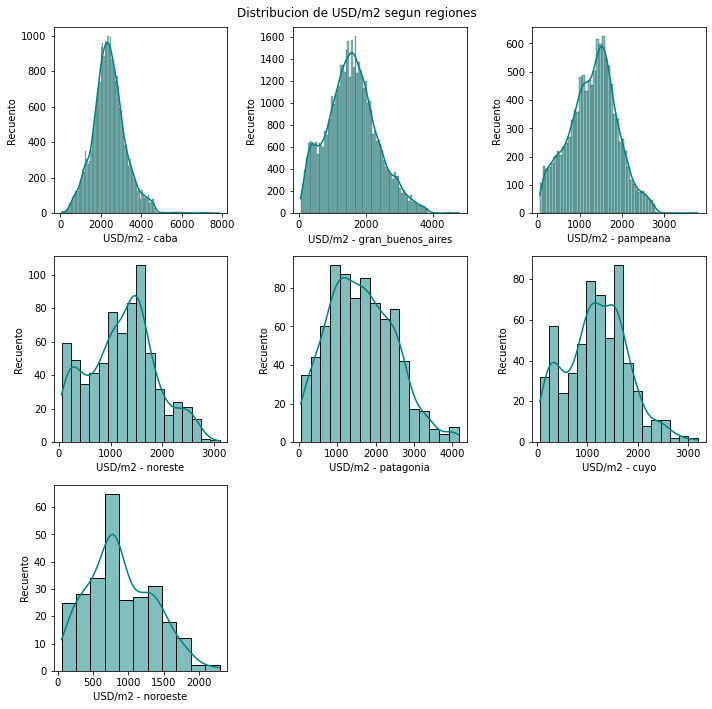

In [55]:
fig = plt.figure( figsize=(10, 10))
for i, col in enumerate(data.region_name.unique()):    
    ax=fig.add_subplot(3,3,i+1)
    plt.suptitle("Distribucion de USD/m2 segun regiones")
    mask_usd_region = data.usd_m2.loc[data.region_name == col]    
    sns.histplot( x=mask_usd_region, kde=True, color="teal", ax=ax)    
    ax.set(xlabel= "USD/m2" + " - " + col, ylabel="Recuento") 

fig.tight_layout()  
plt.show()

[Text(0.5, 0, 'USD/m2'),
 Text(0, 0.5, 'Recuento'),
 Text(0.5, 1.0, 'Distribucion de USD/m2 segun regiones')]

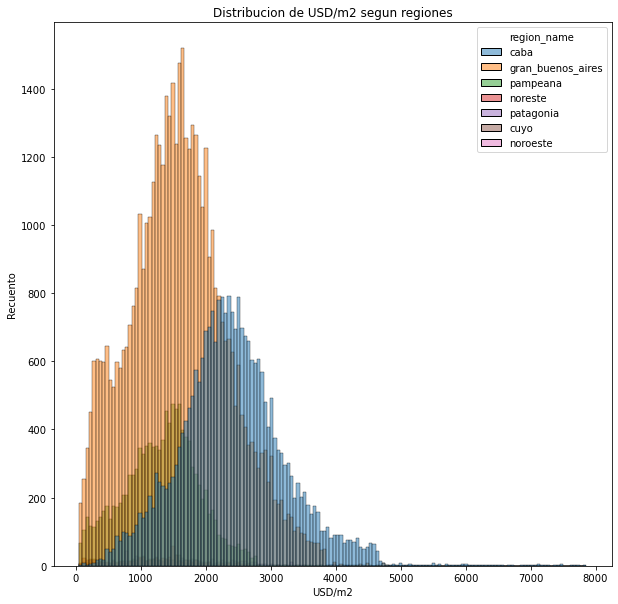

In [56]:
fig = plt.figure( figsize=(10, 10))
sns.histplot(data, x="usd_m2", hue="region_name").set(xlabel= "USD/m2", ylabel="Recuento", title="Distribucion de USD/m2 segun regiones")

Observando ambos graficos se evidencia que tienen una distribucion sesgada a la derecha a causa de valores muy altos. 

Las mayores cantidades de propiedades se encuentran en CABA y Buenos aires. tambien se observa que en en CABA hay mayor numero de propiedades pero la mayoria de sus valores se encuentran aprox en 1500 USD/m2 mientras que en Buenos aires hay menos cantidad pero su mayoria se encuentra en aprox 2500 USD/m2 y es conde se encuentran los valores mas altos

In [57]:
data.columns

Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', 'region_name', 'usd_m2'],
      dtype='object')

In [58]:
# Eliminamos las columnas que ya no nos sirven

data.drop(columns=["price", "price_aprox_local_currency","surface_covered_in_m2","price_usd_per_m2", "price_per_m2"], inplace=True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1812\881029046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["price", "price_aprox_local_currency","surface_covered_in_m2","price_usd_per_m2", "price_per_m2"], inplace=True)


## 4.4 lat and lon

<AxesSubplot:>

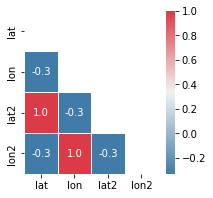

In [59]:
#chequeo que lat-lon sea igual a lat y lon juntos
#separo y spliteo columna lat-lon

data_lat_lon = data["lat-lon"].str.split(",", expand = True)
lat2 = data_lat_lon[0].astype(float)
lon2 = data_lat_lon[1].astype(float)

#creo dataframe com lat, lat2, lon y lon2 y correlaciono

data_lat_lon_correlation = pd.DataFrame({"lat": data["lat"], "lon": data["lon"], "lat2": lat2, "lon2": lon2}).corr()

fig,ax = plt.subplots(figsize=(3, 3))
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
matrix = np.triu(data_lat_lon_correlation)
sns.heatmap(data_lat_lon_correlation, annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap=cmap, mask=matrix)

In [60]:
# Elimino columna lat-lon
data.drop(labels="lat-lon", axis=1, inplace=True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1812\996405848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(labels="lat-lon", axis=1, inplace=True)


Grafico CABA mediante un scatterplot y para ver como esta distribuida geograficamente las propiedades.

Se trata de realizar con las otras regiones pero al tener pocos datos y valores de lat y lon muy dispares no se pueden graficar correctamente asi que no lo vamos a colocar.

Ahora vamos a buscar outliers de lat y lon. Para eso obtenemos los rangos de valores latitudinales y longitudinales de Argentina y buscamos si las propiedades están por fuera del rango.

In [61]:
# Buscar outliers de lat y lon
# Argentina tiene valores de latitud entre -22 y -55 (obtenido de google maps)
# y de longitud entre -74 y -53 (obtenido de google maps)

lat_mask = (data["lat"] > (-55)) | (data["lat"] < (-22))
lat = data.lat[lat_mask]

lon_mask = (data["lon"] > -74) | (data["lon"] < (-53))
lon = data.lon[lon_mask]

print((data["lat"].value_counts() == lat.value_counts()).describe())
print((data["lon"].value_counts() == lon.value_counts()).describe())

# no hay publicacion de inmueble por fuera de Argentina

count     34240
unique        1
top        True
freq      34240
Name: lat, dtype: object
count     34243
unique        1
top        True
freq      34243
Name: lon, dtype: object


<AxesSubplot:xlabel='lat', ylabel='lon'>

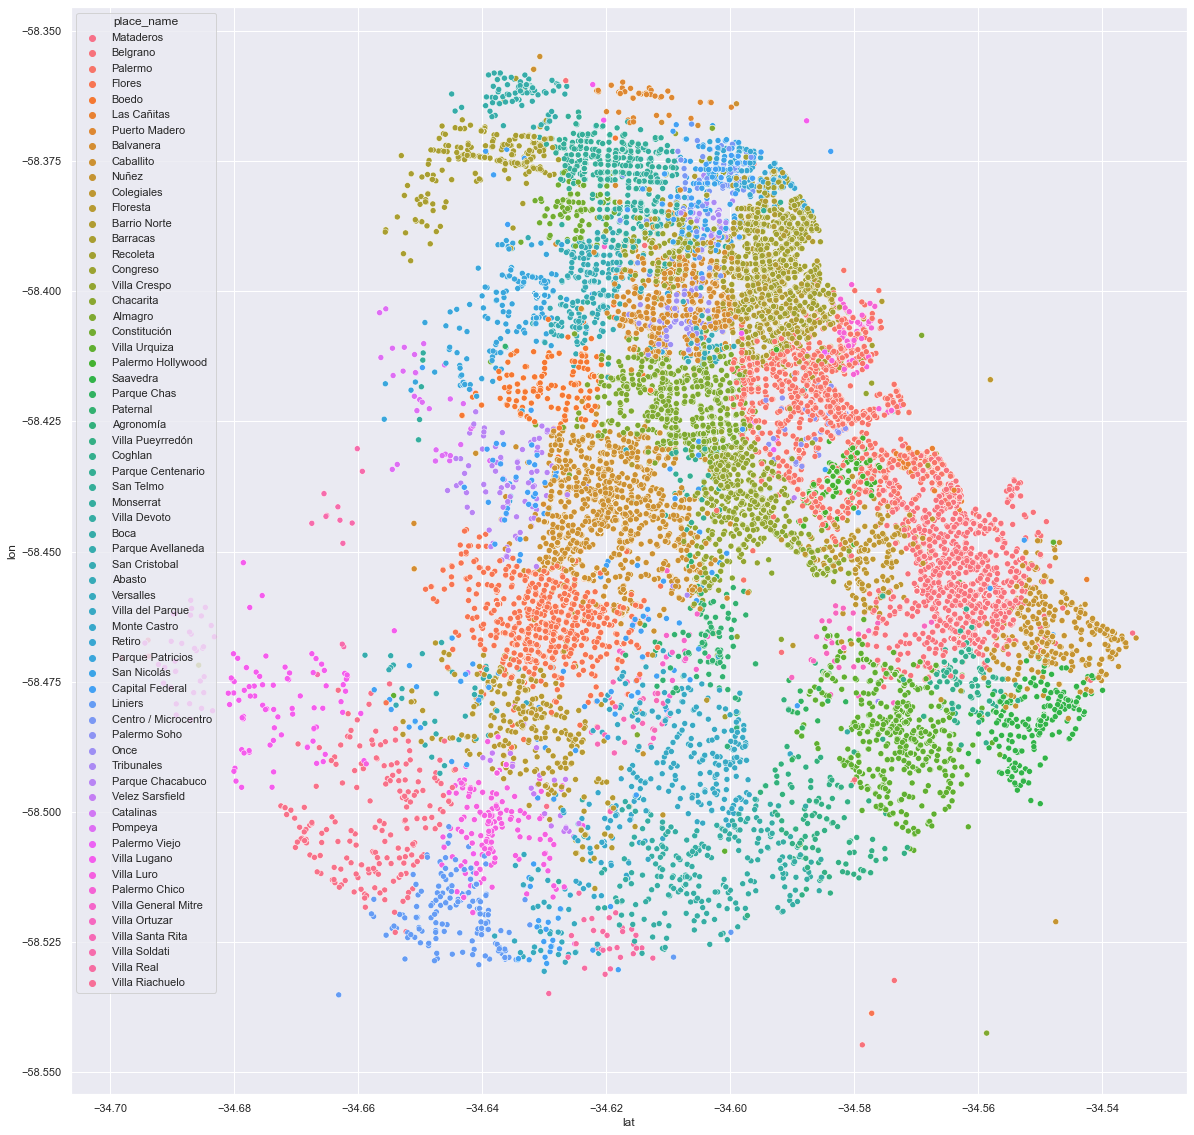

In [62]:
# Creo una variable
geo_arg_ba = data[data["region_name"] == "caba"]

# Filtro cone sta latitud porque habia un outlier que me alteraba dsitribucion del grafico
mask_max = geo_arg_ba["lat"] > (-35	)
geo_arg_ba = geo_arg_ba.loc[mask_max]


#Grafico
sns.set(rc={"figure.figsize":(20, 20)})
sns.scatterplot(data=geo_arg_ba, x="lat", y="lon", hue="place_name")

## 4.5 geonames_id
Drop, porque sirve para sacar place name que lo completamos previamente

In [63]:
data.drop(columns="geonames_id", inplace=True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1812\3270811689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns="geonames_id", inplace=True)


## 4.6 Expensas

Se realiza regex para completar columna

In [64]:
patron_expensas="(?P<Expensas1>(\sEXPENSAS\:\s\d+)|(\sexpensas\:\s\d+)|(\sEXPENSAS\s\d+)|(\sexpensas\s\d+)|(\d+\sEXPENSAS\s)|(\d+\sexpensas\s)(\sEXPENSA\:\s\d+)|(\sexpensa\:\s\d+)|(\sEXPENSA\s\d+)|(\sexpensas\s\d+)|(\d+\sEXPENSA\s)|(\d+\sexpensa\s)|(Expensas\:\s\$\s\d\W\d+)|(\sExpensas\:\s\$\s\d\W\d+)|(EXPENSAS\:\s\$\s\d\W\d+)|(\sEXPENSAS\:\s\$\s+\d\W\d+)|(Expensas\:\s\$\s\d+\W\d+)|(\sExpensas\:\s\$\s\d+\W\d+)|(EXPENSAS\:\s\$\s\d+\W\d+)|(\sEXPENSAS\:\s\$\s\d+\W\d+)|(Expensas\:\su\$s\s\d+)|(\sExpensas\:\su\$s\s\d+)|(Expensas\:\su\$s\s\d+\W\d+)|(\sExpensas\:\su\$s\s\d+\W\d+)|(Expensas\su\$s\s\d+)|(\sExpensas\su\$s\s\d+)|(Expensas\su\$s\s\d+\W\d+)|(\sExpensas\su\$s\s\d+\W\d+)|(EXPENSAS\:\su\$s\s\d+)|(\sEXPENSAS\:\su\$s\s\d+)|(Expensas\:\su\$s\s\d+\W\d+)|(\sEXPENSAS\:\su\$s\s\d+\W\d+)|(EXPENSAS\su\$s\s\d+)|(\sEXPENSAS\su\$s\s\d+)|(EXPENSAS\su\$s\s\d+\W\d+)|(\sEXPENSAS\su\$s\s\d+\W\d+))"

expensas_pattern_regex = re.compile(patron_expensas)

data_expensas_match = data['description'].apply(lambda x:  x if x is np.NaN else expensas_pattern_regex.search(x))

mask_data_expensas_match_notnull = data_expensas_match.notnull()

data.loc[mask_data_expensas_match_notnull, "ObjectExpensesDescription"] = data_expensas_match[mask_data_expensas_match_notnull].apply(lambda x: x.group("Expensas1"))

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1812\2446148236.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[mask_data_expensas_match_notnull, "ObjectExpensesDescription"] = data_expensas_match[mask_data_expensas_match_notnull].apply(lambda x: x.group("Expensas1"))


In [65]:
#Verifico los campos expensas, descripción y el campo patrón:
data_aux_expensas= data.loc[mask_data_expensas_match_notnull, ["description", "expenses","ObjectExpensesDescription"]]
data_aux_expensas

,description,expenses,ObjectExpensesDescription
143,"EDIFICIO - MeirLiving, cocina, dormitorio , ba...",NaN,Expensas: $ 1.300
167,Corredor Responsable: Mariano Aufseher - CUCIC...,NaN,EXPENSAS: $ 1.600
215,"Ideal tienda comercial, no apto gastronómico.L...",NaN,Expensas: $ 1.000
323,- Absolutamente impecable tres ambientes en pl...,NaN,Expensas: $ 2.000
341,Corredor Responsable: Cristian Arnal Ponti - C...,NaN,Expensas: $ 4.700
...,...,...,...
118693,Corredor Responsable: Rebeca Stern - C.U.C.I.C...,NaN,Expensas: $ 2.200
118780,"Excelente 3 ambientes en 4° piso al frente, en...",1500.0,Expensas: $ 1.500
119120,"LIVING/COMEDOR, BALCON TERRAZA, TOILETTE, COCI...",NaN,Expensas: $ 5.600
119270,Corredor Responsable: Gustavo Guastello - C.U....,NaN,expensas 34


In [66]:
print(f"Encontramos {data.ObjectExpensesDescription.count()} valores\n")
print(f"Un porcentaje de {data.ObjectExpensesDescription.count()/data.shape[0]*100}")

Encontramos 334 valores

Un porcentaje de 0.37817885368780996


Observamos que solo se recupero un 0.3% , por lo cual decidimos dropearla ya que su cantidad de valores nulos es demasiado

In [67]:
# Dropeamos la columna expenses y la columna creada para compararlo
data.drop(columns=["expenses", "ObjectExpensesDescription"], inplace=True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1812\3848601302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["expenses", "ObjectExpensesDescription"], inplace=True)


## 4.7 Floor

Se realiza regex para completar columna

In [68]:
patron_floor= "(?P<floor1>(\d+\spiso\s)|(piso\s\d+))"

floor_pattern_regex = re.compile(patron_floor)

data_floor_match = data['description'].apply(lambda x:  x if x is np.NaN else floor_pattern_regex.search(x))

mask_data_floor_match_notnull = data_floor_match.notnull()

data.loc[mask_data_floor_match_notnull, "ObjectFloorDescription"] = data_floor_match[mask_data_floor_match_notnull].apply(lambda x: x.group("floor1"))

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1812\2178533162.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[mask_data_floor_match_notnull, "ObjectFloorDescription"] = data_floor_match[mask_data_floor_match_notnull].apply(lambda x: x.group("floor1"))


In [69]:
#verifico los campos floor, descripción y el campo patrón:
data_aux_floor= data.loc[mask_data_floor_match_notnull, ["description", "floor","ObjectFloorDescription"]]
data_aux_floor

,description,floor,ObjectFloorDescription
17,Excelente 3 ambientes en un 6 piso y con terra...,NaN,6 piso
33,Excelente 3 ambientes en un 6 piso en esquina ...,NaN,6 piso
48,"PISO 13, Orientación norte, disposición al fre...",NaN,piso 13
96,"Departamento de 2 ambientes, ubicado en la cos...",3.0,piso 3
120,"Depto de 3 amb. c/cochera cubierta, en piso 12...",12.0,piso 12
...,...,...,...
120980,"Excelente departamento tipo Pent house, ubicad...",NaN,piso 11
121152,Monoambiente divisible en 3 piso al frente con...,NaN,3 piso
121157,Torre de 16º pisos ubicado en pleno centro com...,NaN,piso 16
121160,Edificio en esquina de muy buena categoría de ...,NaN,piso 1


In [70]:
print(f"Encontramos {data.ObjectFloorDescription.count()} valores\n")
print(f"Un porcentaje de {data.ObjectFloorDescription.count()/data.shape[0]*100}")


Encontramos 2187 valores

Un porcentaje de 2.476278901243235


Solo se recupero un 2.4% de datos, lo cuale es muy poco. Por este motivo se decide eliminar la columna porque su valor de nulos es demasiado.

In [71]:
# Dropeamos la columna expenses y la columna creada para compararlo
data.drop(columns=["floor", "ObjectFloorDescription"], inplace=True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1812\2546325384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["floor", "ObjectFloorDescription"], inplace=True)


## 4.8 Busqueda de servicios de los departamentos

Buscaremos diferentes servicios de la casa como pileta, parrilla, lavarropa, entre otras. Y la trataremos como variables categoricas por si lo tiene o no.

### 4.8.1 Pileta

In [72]:
pileta_pattern = re.compile(r"(\s*[pP]isci|\s*[pP]isin|\s*[pP]isci|\s*[Pp]ilet)")
extrac_pileta = extract_description(pileta_pattern, data)
data["pileta"] = pd.get_dummies(extrac_pileta.str.replace(pileta_pattern, "1" , regex=True))

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1812\4266933366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pileta"] = pd.get_dummies(extrac_pileta.str.replace(pileta_pattern, "1" , regex=True))


### 4.8.2 Parrilla

In [73]:
parrilla_pattern = re.compile(r"(\s*parrill)", flags=re.IGNORECASE)
extrac_parrilla = extract_description(parrilla_pattern, data)
data["parrilla"] = pd.get_dummies(extrac_parrilla.str.replace(parrilla_pattern, "1" , regex=True))

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1812\2955606833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["parrilla"] = pd.get_dummies(extrac_parrilla.str.replace(parrilla_pattern, "1" , regex=True))


### 4.8.3 Cochera

In [74]:
cochera_pattern = re.compile(r"(\s*cocher|\s*garag)", flags=re.IGNORECASE)
extrac_cochera = extract_description(cochera_pattern, data)
data["cochera"] = pd.get_dummies(extrac_cochera.str.replace(cochera_pattern, "1" , regex=True))

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1812\3412339554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cochera"] = pd.get_dummies(extrac_cochera.str.replace(cochera_pattern, "1" , regex=True))


### 4.8.4 Gym

In [75]:
gimnasio_pattern = re.compile(r"(\s*g[iy]m)", flags=re.IGNORECASE)
extrac_gimnasio = extract_description(gimnasio_pattern, data)
data["gimnasio"] = pd.get_dummies(extrac_gimnasio.str.replace(gimnasio_pattern, "1" , regex=True))

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1812\4287559208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["gimnasio"] = pd.get_dummies(extrac_gimnasio.str.replace(gimnasio_pattern, "1" , regex=True))


### 4.8.5 Baño

In [76]:
banio_pattern = re.compile(r"(\s*ba[nñ]i?o)", flags=re.IGNORECASE)
extrac_banio = extract_description(banio_pattern, data)
data["baño"] = pd.get_dummies(extrac_banio.str.replace(banio_pattern, "1" , regex=True))
data["baño"].unique()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1812\2114212125.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["baño"] = pd.get_dummies(extrac_banio.str.replace(banio_pattern, "1" , regex=True))


array([1, 0], dtype=uint8)

In [77]:
data_servicios = data.loc[:,["pileta", "baño", "gimnasio", "parrilla","cochera"]]
nan_servicios = pd.DataFrame({"Total de servicios": data_servicios.sum(), 
                        "%" : round(data_servicios.sum()/data.shape[0]*100)}).sort_values(by= "Total de servicios", ascending=False)

nan_servicios

,Total de servicios,%
baño,60612,69.0
cochera,37411,42.0
parrilla,28233,32.0
pileta,21308,24.0
gimnasio,6833,8.0


Observamos que en un 69% pudimos obtener baños y en un 42% cocheras. Esto es util para valorar las propiedades

## 4.9 Rooms

Buscamos completar rooms con regex

In [78]:
rooms_pattern = re.compile(r"\b(\d{1,2})\s*amb")
describe_rooms = extract_description(rooms_pattern,data).astype(float)
describe_rooms.unique()

array([nan,  3.,  4.,  2.,  5.,  1.,  6.,  8., 25.,  7., 18., 11.,  9.,
       10., 22., 14., 50., 20., 23.])

In [79]:
# Fill la columna rooms original
data.rooms.fillna(describe_rooms, inplace=True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1812\1870651136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rooms.fillna(describe_rooms, inplace=True)


Vamos a reemplazar por valores categoricos:

- Sin informacion
- 1 ambiente
- 2 ambientes
- 3 ambientes
- 4 o mas ambientes

In [80]:
# Reemplazo numero de ambientes por sus categorias

data.rooms.loc[data.rooms >= 4] = "4 o mas ambientes"
data.rooms.loc[data.rooms == 1] = "1 ambiente"
data.rooms.loc[data.rooms == 2] = "2 ambientes"
data.rooms.loc[data.rooms == 3] = "3 ambientes"
data.rooms.loc[data.rooms.isna()] = "Sin informacion"

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1812\1576532748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rooms.loc[data.rooms >= 4] = "4 o mas ambientes"
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1812\1576532748.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rooms.loc[data.rooms == 1] = "1 ambiente"
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1812\1576532748.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [81]:
data.rooms.unique()

array(['Sin informacion', '1 ambiente', '4 o mas ambientes',
       '3 ambientes', '2 ambientes'], dtype=object)

# 5. Análisis de variables categóricas

In [82]:
categorical.describe().T.sort_values(by= "unique", ascending=True)

,count,unique,top,freq
operation,121220,1,sell,121220
country_name,121220,1,Argentina,121220
property_type,121220,4,apartment,71065
currency,100809,4,USD,87587
region_name,121220,7,gran_buenos_aires,61131
state_name,121220,28,Capital Federal,32316
place_name,121197,1060,Córdoba,9254
place_with_parent_names,121220,1164,|Argentina|Santa Fe|Rosario|,8504
lat-lon,69670,47203,"-34.4026444,-58.6684776",312
title,121220,72705,DEPARTAMENTO EN VENTA,4855


## 5.1-2  Operation y Country_name

In [83]:
#Notamos que country_name y operation correponden a campos con un único valor para todo el dataset, por lo que podemos eliminarlo
data.drop(['country_name','operation'],axis=1,inplace=True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1812\660117265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['country_name','operation'],axis=1,inplace=True)


## 5.3 Currency


In [84]:
# Analizamos la cantidad de tipos de moneda que hay
data.currency.value_counts()

USD    76856
ARS    11116
PEN        1
Name: currency, dtype: int64

Se observa que los valores son principalmente en dolares. Se elimina porque se usó la columna en dolares para realizar los USD/M2

In [85]:
data.drop(['currency'],axis=1,inplace=True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1812\3644800554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['currency'],axis=1,inplace=True)


## 5.4 Property type

Observamos distribucion  de las propiedades segun region

In [86]:
#creando funcion

def countplot_plot(feature, hue, xlabel="", ylabel=""):

    fig = plt.figure(figsize=(30,30))

    for i, col in enumerate(data[feature].unique()):    
        plt.subplot(3, 4, i+1)
        mask_plot = data[feature] == col
        ax =sns.countplot(x=data[feature][mask_plot], hue=data[hue])
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        
        for c in ax.containers:    
            labels = [f'{h/data[feature][mask_plot].count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]    
            ax.bar_label(c, labels=labels, label_type="edge")

    plt.show()

Realizamos grafico de distribucion segun propiedad y region

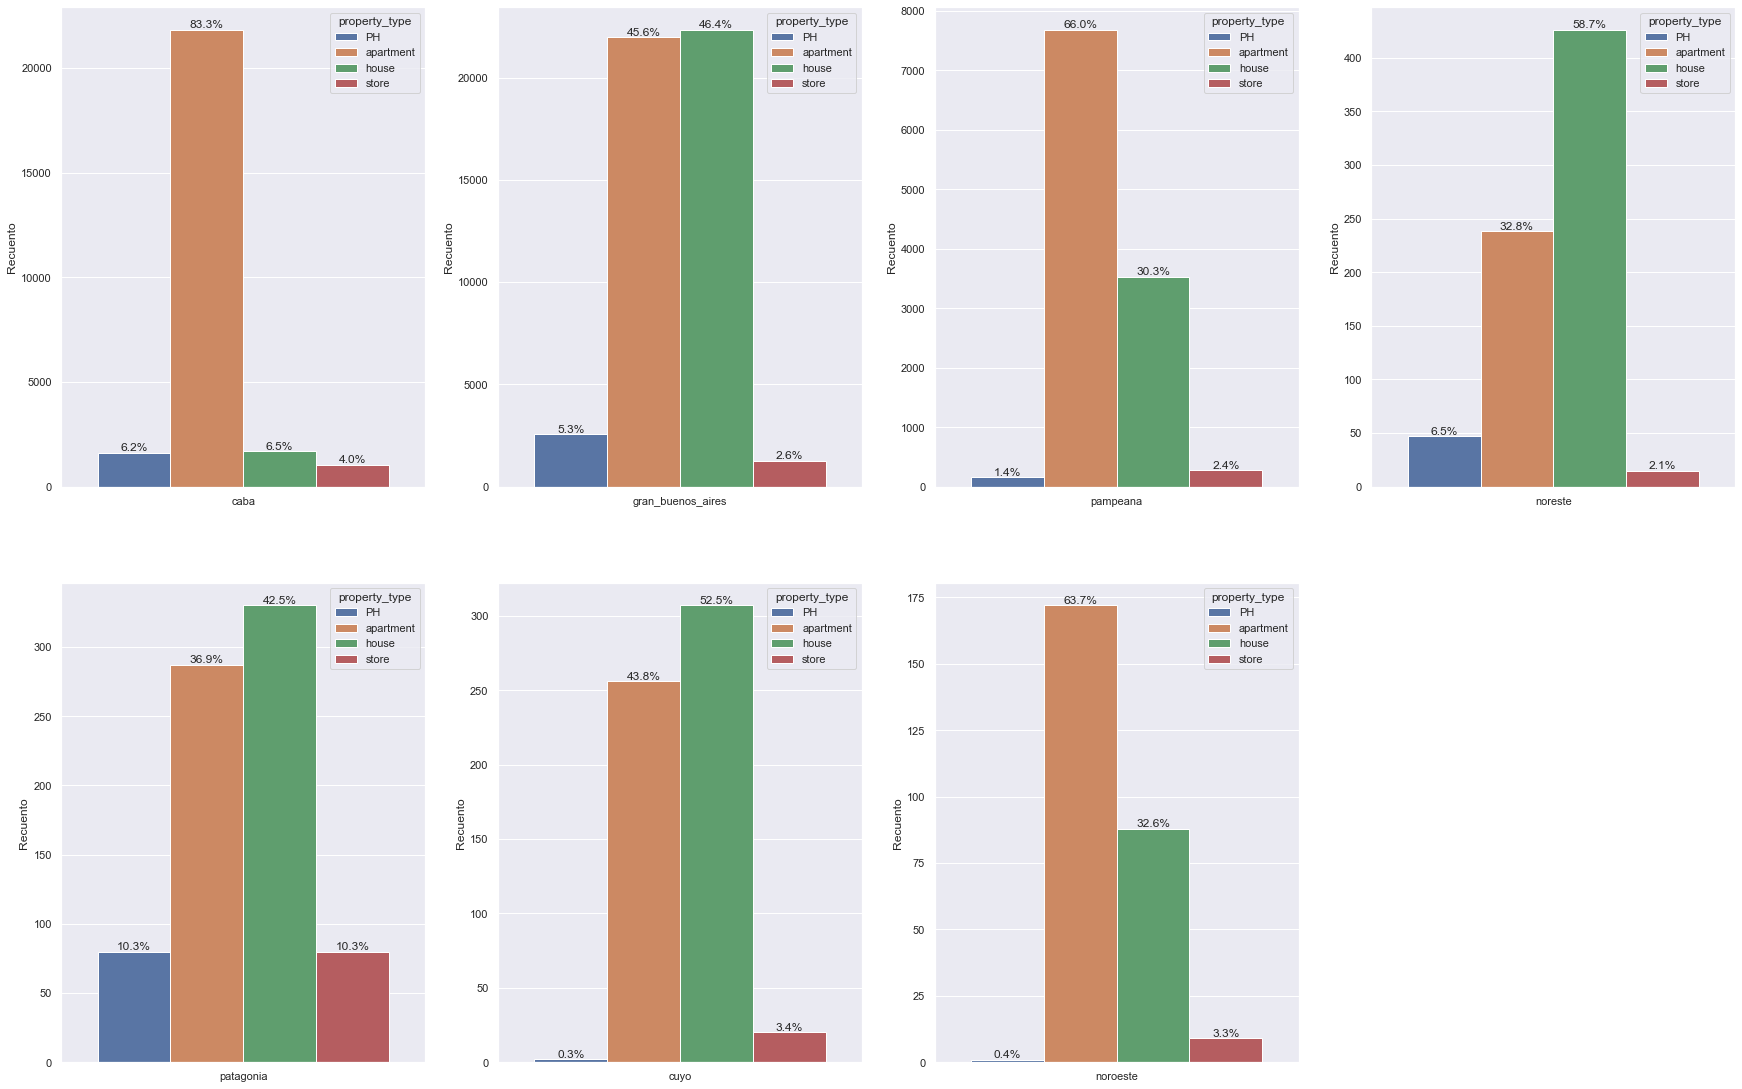

In [87]:
countplot_plot('region_name',"property_type", ylabel="Recuento" )

Se observa que en CABA la mayoria de sus propiedades son departamentos, como ocurre en la region pampeana y region del Noroeste. En cambio en el Noreste, Cuyo y Patagonia las casas son las principales propiedades. En gran Buenos Aires la distribucion entre casas y departamentos es mas parejas con mayor cantidadad de las primeras. Los PH y los stores son la minoria en todas las regiones

## 5.5-6  Place_name y place_with_parent_names	

In [88]:
# Busco los 23 valores de place_name faltantes (NaN), pudiendo completarlos con los valores de place_with_parent_names.

data.place_with_parent_names[data.place_name.isna()].value_counts()

|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    21
Name: place_with_parent_names, dtype: int64

In [89]:
# Observo que son todos de Tigre, asi que completo con Tigre
data.place_name.fillna("Tigre", inplace=True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1812\962464171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.place_name.fillna("Tigre", inplace=True)


In [90]:
data.drop(columns="place_with_parent_names", inplace=True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1812\359576379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns="place_with_parent_names", inplace=True)


## 5.7 lat-lon
Se elimina esta categoria ya que se observa que tienen mismos valores que las columnas lat y lon

## 5.8-9 Title and Description

No se realizan transformaciones ya que a ambos campos se usaron para extraer información a fin de completar otros campos con valores faltantes en:

- Precio
- m2
- Expensas
- Floor

In [91]:
data.drop(columns=['title','description'],inplace=True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1812\1842708222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['title','description'],inplace=True)


## 5.10-11 image_thumbnail y properati_url

In [92]:
# No se extraerá información útil de los campos image_thumbnail y properati_url, por lo que estos campos serán eliminados
data.drop(columns=['image_thumbnail','properati_url'],inplace=True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1812\1836987337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['image_thumbnail','properati_url'],inplace=True)


## 5.12 State Name

Lo usamos para dividir las diferentes regiones. Va  aser importante al realizar el modelo.


<AxesSubplot:xlabel='count', ylabel='state_name'>

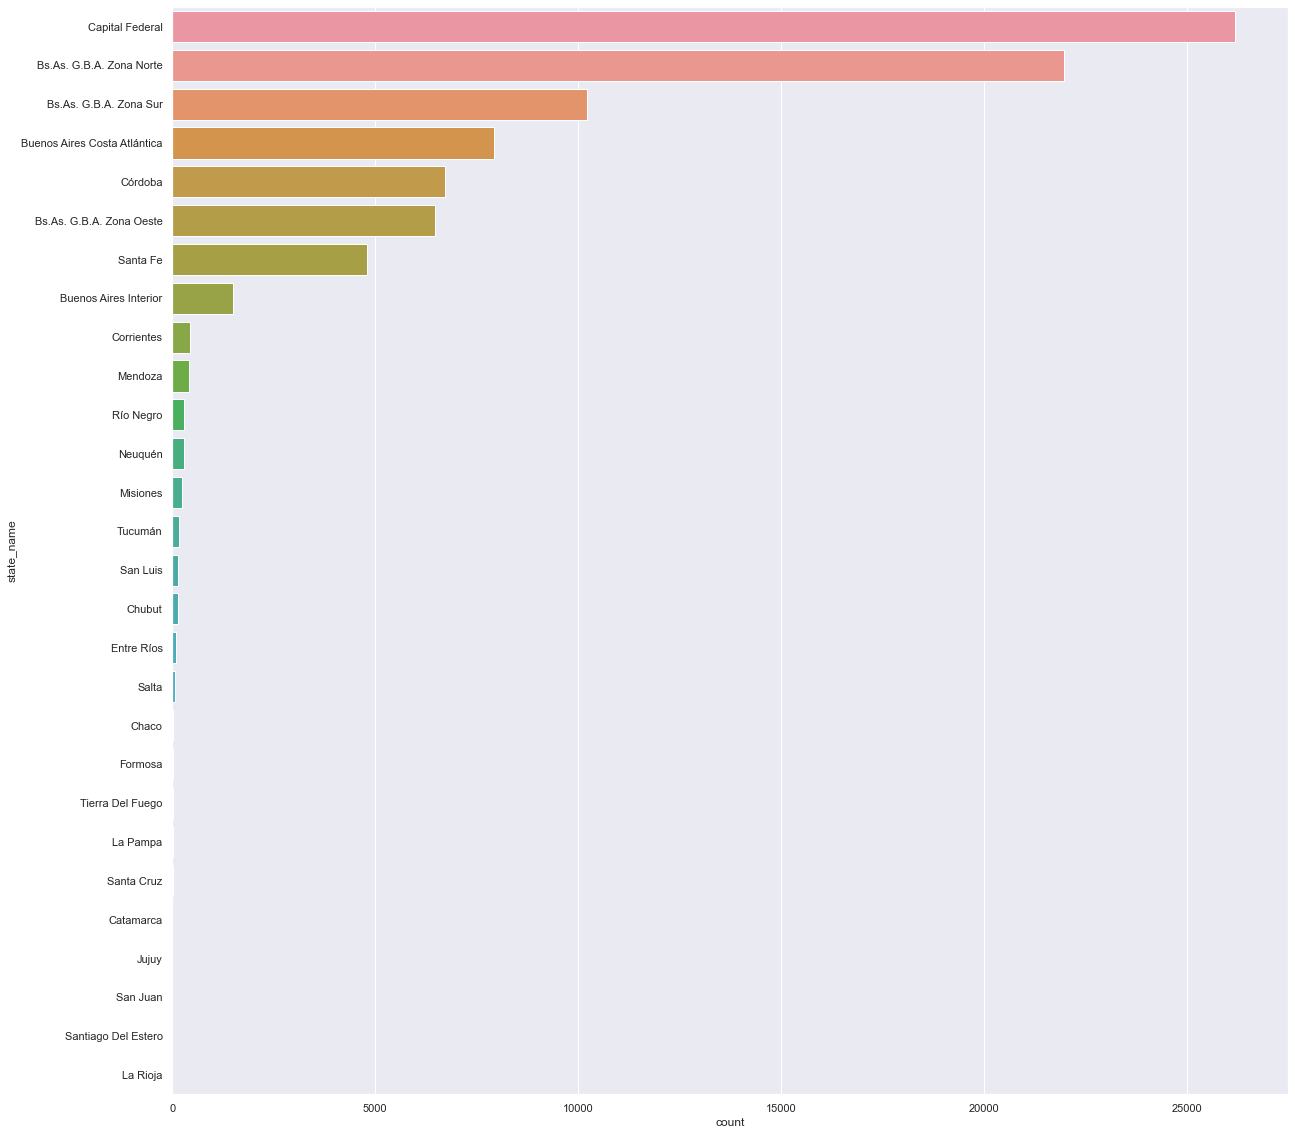

In [93]:
sns.countplot(data=data, y="state_name", orient="h",order = data['state_name'].value_counts().index)

Las principales propiedades se encuentran en CABA seguido por Buenos aires

## 5.13 Correlacion

In [94]:
# Creamos nueva variable con solo los valores numericos
numerical_clean = data.select_dtypes((["uint8","float"]))

<AxesSubplot:>

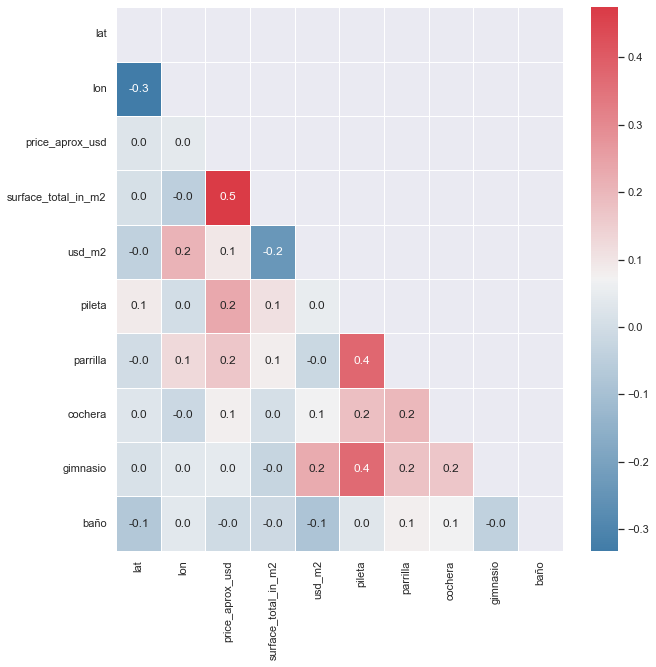

In [95]:
# Calculamos correlacion 
numerical_clean_corr = numerical_clean.corr()

#Graficamos
fig,ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
matrix = np.triu(numerical_clean_corr)
sns.heatmap(numerical_clean_corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap=cmap, mask=matrix)

Observamos que las principales correlaciones son entre los metros cuadrados totales y el precio. Algo esperable ya que a mas metros cuadrados, mayor es el precio

Ademas hay correlacion entre pileta con gimnasio y parrilla. Lo que da entender que cuando hay pileta la propiedad tiene parrilla y gimnasio. Algo que afecta levemente el precio de la propiedad.

## 5.14 Data final

In [96]:
print(f"El dataset final tiene en total {data.size} valores repartidos en {data.shape[0]} filas y {data.shape[1]} columnas\n")

data.sample(5)

El dataset final tiene en total 1324770 valores repartidos en 88318 filas y 15 columnas



,property_type,place_name,state_name,lat,lon,price_aprox_usd,surface_total_in_m2,rooms,region_name,usd_m2,pileta,parrilla,cochera,gimnasio,baño
70810,house,Banfield,Bs.As. G.B.A. Zona Sur,NaN,NaN,85000.00,90.0,Sin informacion,gran_buenos_aires,944.444444,1,0,1,0,1
17579,apartment,Nordelta,Bs.As. G.B.A. Zona Norte,-34.400140,-58.649850,220000.00,80.0,2 ambientes,gran_buenos_aires,2750.000000,1,1,1,1,0
76620,apartment,Belgrano,Capital Federal,-34.560018,-58.466872,125838.00,50.0,Sin informacion,caba,2516.760000,0,0,0,0,1
19711,house,Rosario,Santa Fe,-33.077914,-60.570331,85000.00,50.0,Sin informacion,pampeana,1700.000000,1,1,0,0,1
111715,apartment,Rosario,Santa Fe,NaN,NaN,149126.49,61.0,Sin informacion,pampeana,2444.696557,0,0,0,0,0


# 6. Guardar nuevo Dataset

In [97]:
data.to_csv('properatti_clean.csv')